## Flow chart

This notebook makes a flow chart describing the experiments.

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import FancyBboxPatch, Ellipse


# Set figure parameters
fig_width = 3.25 #ECS spec is 3.25" width
fig_width_2col_inches = 7
fig_height = (3/4)*fig_width # standard ratio

rcParams['figure.autolayout'] = True
rcParams['lines.linewidth'] = 1.0
rcParams['font.size'] = 8
rcParams['font.sans-serif'] = 'Arial'
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'Arial'
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

rcParams['lines.markersize'] = 5
rcParams['legend.fontsize'] = 7
rcParams['xtick.bottom'] = False
rcParams['ytick.direction'] = 'in' 

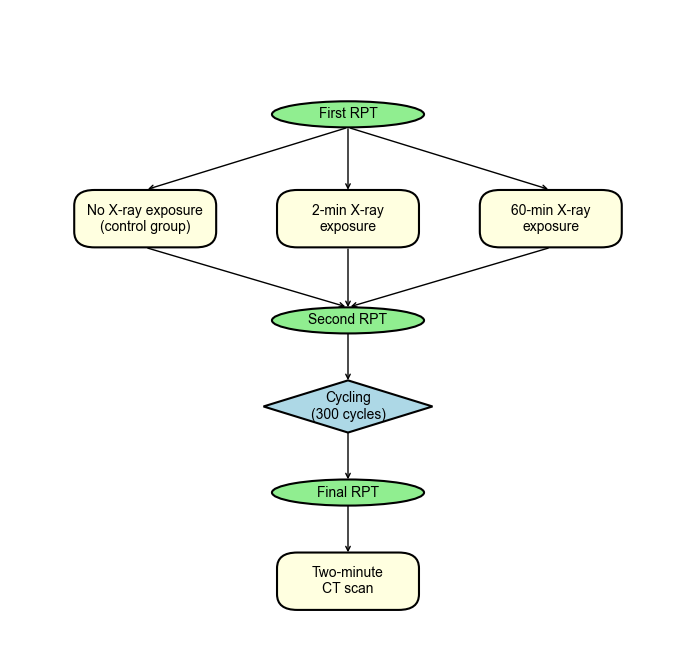

In [3]:
# Function to draw a box with customizable shapes and colors
def draw_custom_box(ax, text, xy, width=1.5, height=0.5, shape="rectangle", facecolor="lightblue", fontsize=10):
    if shape == "rectangle":
        rect = FancyBboxPatch((xy[0] - width / 2, xy[1] - height / 2), width, height,
                              boxstyle="round,pad=0.3", edgecolor="black", facecolor=facecolor, lw=1.5)
        ax.add_patch(rect)
    elif shape == "ellipse":
        ellipse = Ellipse(xy, 1.5*width, height, edgecolor="black", facecolor=facecolor, lw=1.5)
        ax.add_patch(ellipse)
    ax.text(xy[0], xy[1], text, ha='center', va='center', fontsize=fontsize)

# Function to draw a diamond using a polygon
def draw_diamond(ax, text, xy, width=2.5, height=1.0, facecolor="lightblue", fontsize=10):
    # Define the diamond vertices
    vertices = [
        (xy[0], xy[1] + height / 2),  # Top vertex
        (xy[0] + width / 2, xy[1]),  # Right vertex
        (xy[0], xy[1] - height / 2),  # Bottom vertex
        (xy[0] - width / 2, xy[1])   # Left vertex
    ]
    diamond = plt.Polygon(vertices, closed=True, edgecolor="black", facecolor=facecolor, lw=1.5)
    ax.add_patch(diamond)
    ax.text(xy[0], xy[1], text, ha='center', va='center', fontsize=fontsize)

# Function to draw an arrow with a vertical shift adjustment
def draw_shifted_arrow(ax, start, end, text=None, shift=0.25):
    adjusted_start = (start[0], start[1] + shift)
    adjusted_end = (end[0], end[1] + shift)
    ax.annotate('', xy=adjusted_end, xytext=adjusted_start, arrowprops=dict(facecolor='black', arrowstyle='->'))
    if text:
        ax.text((adjusted_start[0] + adjusted_end[0]) / 2, 
                (adjusted_start[1] + adjusted_end[1]) / 2, 
                text, ha='center', va='center', fontsize=10)

# Initialize the figure and axis
fig_width = 3.25 #ECS spec is 3.25" width
fig_width_2col_inches = 7
fig_height = 2*fig_width # standard ratio
fig, ax = plt.subplots(figsize=(fig_width_2col_inches, fig_height))

ax.set_xlim(-5, 5)
ax.set_ylim(-10, 2)
ax.axis('off')

# Step 1: First RPT
draw_custom_box(ax, "First RPT", (0, 0), shape="ellipse", facecolor="lightgreen")

# Split to three branches: X-ray exposure groups
draw_shifted_arrow(ax, (0, -0.5), (-3, -1.7))
draw_shifted_arrow(ax, (0, -0.48), (0, -1.75))
draw_shifted_arrow(ax, (0, -0.5), (3, -1.7))

draw_custom_box(ax, "No X-ray exposure\n(control group)", (-3, -2), facecolor="lightyellow")
draw_custom_box(ax, "2-min X-ray\nexposure", (0, -2), facecolor="lightyellow")
draw_custom_box(ax, "60-min X-ray\nexposure", (3, -2), facecolor="lightyellow")

# Merge back to Step 3: Second RPT
draw_shifted_arrow(ax, (-3, -2.8), (0, -3.95))
draw_shifted_arrow(ax, (0, -2.78), (0, -4))
draw_shifted_arrow(ax, (3, -2.8), (0, -3.95))

draw_custom_box(ax, "Second RPT", (0, -3.95), shape="ellipse", facecolor="lightgreen")

# Step 4: Cycling (Diamond shape)
draw_shifted_arrow(ax, (0, -4.4), (0, -5.4))
draw_diamond(ax, "Cycling\n(300 cycles)", (0, -5.6), facecolor="lightblue")

# Step 5: Final RPT
draw_shifted_arrow(ax, (0, -6.3), (0, -7.3))
draw_custom_box(ax, "Final RPT", (0, -7.25), shape="ellipse", facecolor="lightgreen")

# Step 6: Two-minute CT scan
draw_shifted_arrow(ax, (0, -7.7), (0, -8.7))
draw_custom_box(ax, "Two-minute\nCT scan", (0, -8.95), facecolor="lightyellow")

# Show the flowchart
plt.savefig("flowchart.pdf", dpi=300, bbox_inches='tight')